In [1]:
import pandas as pd
import numpy as np
import statistics

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [2]:
df = pd.read_csv('Property_structured_data.csv')

In [3]:
initial_df = df.shape

In [4]:
initial_df_columns = df.columns.to_list()

## Clean Database

### Price (float)

In [5]:
z_scores_price = stats.zscore(df['price'])
abs_z_scores_price = np.abs(z_scores_price) 
filtered_entries_price = (abs_z_scores_price < 3)
df = df[filtered_entries_price]

In [6]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [7]:
df= df.loc[df['price'] != -1]
df.shape

(58318, 23)

### Surface (float)

In [8]:
df = df.loc[df['surface'] <= 800]

In [9]:
df = df.loc[df['surface'] >= 35]

In [10]:
df = df.loc[df['surface'] != -1]
df.shape

(47820, 23)

### Sub Type of property (filter and drop)

In [11]:
df['subtype_of_property'].value_counts()

HOUSE                   20431
APARTMENT               15619
VILLA                    2700
APARTMENT_BLOCK          1318
DUPLEX                   1217
GROUND_FLOOR             1131
PENTHOUSE                 967
MIXED_USE_BUILDING        925
EXCEPTIONAL_PROPERTY      511
SERVICE_FLAT              471
FLAT_STUDIO               450
MANSION                   437
TOWN_HOUSE                375
COUNTRY_COTTAGE           292
BUNGALOW                  239
LOFT                      225
FARMHOUSE                 147
TRIPLEX                   114
CHALET                    101
OTHER_PROPERTY             65
MANOR_HOUSE                61
CASTLE                     15
KOT                         8
PAVILION                    1
Name: subtype_of_property, dtype: int64

In [12]:
df= df.loc[df['subtype_of_property'] != 'APARTMENT_BLOCK']
df.shape

(46502, 23)

In [13]:
df= df.loc[df['subtype_of_property'] != 'MIXED_USE_BUILDING']
df.shape

(45577, 23)

### Number of bedrooms (int)

In [14]:
df = df.loc[df['number_of_bedrooms'] <20]


In [15]:
df['number_of_bedrooms'] = df['number_of_bedrooms'].replace(-1,0)

In [16]:
df['number_of_bedrooms'].value_counts()

3     15098
2     14663
4      6745
1      4666
5      2450
6       873
0       538
7       261
8       129
9        75
10       31
11       19
12        7
13        5
14        4
17        3
16        2
15        2
18        1
Name: number_of_bedrooms, dtype: int64

### Zip Code (category)

#### XX

In [17]:
df['zip_code_xx'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:2])

In [18]:
df['zip_code_xx'].value_counts()

be_zip_10    3312
be_zip_11    1497
be_zip_83    1427
be_zip_20    1248
be_zip_90    1245
             ... 
be_zip_65     159
be_zip_79     131
be_zip_76     109
be_zip_47      84
be_zip_64      51
Name: zip_code_xx, Length: 80, dtype: int64

#### X

In [19]:
df['zip_code_x'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:1])

In [20]:
df['zip_code_x'].value_counts()

be_zip_1    9529
be_zip_2    7588
be_zip_8    6725
be_zip_9    6238
be_zip_3    3986
be_zip_4    3683
be_zip_7    3066
be_zip_6    3037
be_zip_5    1720
Name: zip_code_x, dtype: int64

### Land surface (float)

In [21]:
#df.loc[(df['land_surface'] == -1) & (df['garden_surface'] > 0 )]

In [22]:
df['land_surface'] = [land_surface if land_surface != -1 else garden_surface if garden_surface > 0 else land_surface for garden_surface,land_surface in zip(df['garden_surface'],df['land_surface'])]

In [23]:
df['land_surface'] = df['land_surface'].replace(-1,0)

In [24]:
df['land_surface'].value_counts()

0       21018
100       206
200       188
300       158
160       152
        ...  
1332        1
3040        1
1894        1
1674        1
4233        1
Name: land_surface, Length: 3305, dtype: int64

### Garden (0,1)

In [25]:
df['garden'] = df['garden'].replace(-1,0)

In [26]:
df['garden'].value_counts()

0    29837
1    15735
Name: garden, dtype: int64

### Garden surface (float)

In [27]:
df['garden_surface'] = df['garden_surface'].replace(-1,0)
df['garden_surface'] = df['garden_surface'].replace(1,0)

In [28]:
df['garden_surface'].value_counts()

0        35949
100        299
200        265
50         194
300        192
         ...  
8782         1
2267         1
586          1
10997        1
7200         1
Name: garden_surface, Length: 1349, dtype: int64

### Fully equiped kitchen  (0,1)

In [29]:
df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0.25, "1.0": 1,"-1": 0.25, "1": 1, "INSTALLED": 0.5, "SEMI_EQUIPPED": 0.75, "NOT_INSTALLED": 0, "USA_INSTALLED": 0.5, "USA_SEMI_EQUIPPED": 0.75, "USA_UNINSTALLED": 0})

In [30]:
#df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0, "1.0": 1,"-1": 0, "1": 1, "INSTALLED": 0, "SEMI_EQUIPPED": 1, "NOT_INSTALLED": 0, "USA_INSTALLED": 0, "USA_SEMI_EQUIPPED": 1, "USA_UNINSTALLED": 0})

In [31]:
df["fully_equipped_kitchen"].value_counts()

0.50    16744
0.25    14836
1.00     7877
0.75     4302
0.00     1813
Name: fully_equipped_kitchen, dtype: int64

### Swiming pool  (0,1)

In [32]:
df['swimming_pool'] = df['swimming_pool'].replace(-1,0)

In [33]:
df['swimming_pool'].value_counts()

0    44641
1      931
Name: swimming_pool, dtype: int64

### Furnished (0,1)

In [34]:
df['furnished'] = df['furnished'].replace(-1,0)

In [35]:
df['furnished'].value_counts()

0    44489
1     1083
Name: furnished, dtype: int64

### Open fire (0,1)

In [36]:
df['open_fire'] = df['open_fire'].replace(-1,0)

In [37]:
df['open_fire'].value_counts()

0    43505
1     2067
Name: open_fire, dtype: int64

### Terrace (0,1)

In [38]:
df['terrace'] = df['terrace'].replace(-1,0)

In [39]:
df['terrace'].value_counts()

1    29162
0    16410
Name: terrace, dtype: int64

### Terrace surface (float)

we have two terraces > 1000 m2 !

In [40]:
df = df.loc[df['terrace_surface'] < 500]

In [41]:
df['terrace_surface'] = df['terrace_surface'].replace(-1,0)

In [42]:
df['terrace_surface'].value_counts()

0      26370
20      1191
10      1082
15       939
12       866
       ...  
163        1
137        1
190        1
293        1
290        1
Name: terrace_surface, Length: 183, dtype: int64

### Facades (int)

In [43]:
df = df.loc[df["number_of_facades"] < 9]

In [44]:
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "APARTMENT"), 1, df["number_of_facades"])
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "HOUSE"), 2, df["number_of_facades"])

In [45]:
df = df.loc[df["number_of_facades"] != -1]

In [46]:
df['number_of_facades'].value_counts()

2    20089
4     9229
3     8114
1     7598
6        6
5        6
8        3
Name: number_of_facades, dtype: int64

### State of the building (category)

Tranform this part to category

In [47]:
"""
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": "TO_RENOVATE",#0.25, 
    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, 
    "TO_RENOVATE": "TO_RENOVATE",#0.25, 
    "TO_RESTORE": "TO_REBUILD",#0.25, 
    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, 
    "GOOD": "GOOD",#0.5, 
    "AS_NEW": "NEW"#1.0
})
"""

'\ndf["state_of_the_building"] = df["state_of_the_building"].map({\n    "NO_INFO": "TO_RENOVATE",#0.25, \n    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, \n    "TO_RENOVATE": "TO_RENOVATE",#0.25, \n    "TO_RESTORE": "TO_REBUILD",#0.25, \n    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, \n    "GOOD": "GOOD",#0.5, \n    "AS_NEW": "NEW"#1.0\n})\n'

In [48]:
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": 0.25, 
    "TO_BE_DONE_UP": 0.75, 
    "TO_RENOVATE": 0.25, 
    "TO_RESTORE": 0.25, 
    "JUST_RENOVATED": 0.75, 
    "GOOD": 0.5, 
    "AS_NEW": 1.0
})

In [49]:
df["state_of_the_building"].value_counts()

0.25    16219
0.50    12399
1.00    10441
0.75     5986
Name: state_of_the_building, dtype: int64

### Type of property (category)

Separate into HOUSE, APARTMENTS and OTHERS

In [50]:
others = ["CHALET", "MANOR_HOUSE", "OTHER_PROPERTY", "CASTLE", "PAVILION"]

In [51]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [52]:
df['type_of_property'] = np.where((df['number_of_bedrooms'] > 20), "OTHER", df['type_of_property'])

In [53]:
df.loc[df["subtype_of_property"].isin(others), "type_of_property"] = "OTHER"

In [54]:
df['type_of_property'].value_counts()

HOUSE        23501
APARTMENT    19429
OTHER         2115
Name: type_of_property, dtype: int64

In [55]:
df_other = df.loc[df["type_of_property"] == "OTHER"]

In [56]:
df= df.loc[df["type_of_property"] != "OTHER"]

In [57]:
df.describe()

,id,postal_code,price,number_of_bedrooms,surface,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_surface,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building
count,4.293000e+04,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,4.293000e+04,42930.000000,42930.000000,42930.000000
mean,9.973246e+06,5056.555858,326038.838714,2.736921,147.532541,0.502615,0.022246,0.039646,0.635127,9.524482,0.340997,110.448241,4.607907e+02,2.378989,0.013557,0.554251
std,2.632769e+05,3030.481285,150093.338928,1.224795,79.470420,0.278007,0.147483,0.195128,0.481400,18.933273,0.474050,1105.380100,5.974487e+03,0.981126,0.115644,0.290610
min,1.882546e+06,1000.000000,2500.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.250000
25%,9.942106e+06,2180.000000,220000.000000,2.000000,93.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.250000
50%,1.005809e+07,4420.000000,295000.000000,3.000000,130.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.100000e+01,2.000000,0.000000,0.500000
75%,1.011448e+07,8380.000000,399000.000000,3.000000,180.000000,0.750000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,4.180000e+02,3.000000,0.000000,0.750000
max,1.015115e+07,9992.000000,799950.000000,17.000000,800.000000,1.000000,1.000000,1.000000,1.000000,420.000000,1.000000,100000.000000,1.100000e+06,6.000000,1.000000,1.000000


### Price/m2

In [58]:
df['price_m2'] = df['price']/df['surface']

In [59]:
df['price_m2'].value_counts()

2500.000000    258
2000.000000    165
3000.000000    160
2750.000000    106
1500.000000    106
              ... 
2160.194175      1
1447.058824      1
2878.205128      1
2852.459016      1
1705.038760      1
Name: price_m2, Length: 18631, dtype: int64

# Crazy zipcode !!!

Values

In [60]:
len(df['zip_code_xx'].value_counts())

80

In [61]:
df_zip_list = ['price_m2','zip_code_xx']

In [62]:
df_zips = df[df_zip_list]

In [63]:
xxx_zip = df_zips.groupby('zip_code_xx')

In [64]:
xxx_zip_list = []
for key, values in xxx_zip:
    xxx_zip_list.append(key)

In [65]:
df_zips_mean = round(df_zips.groupby('zip_code_xx').mean(),2)

In [66]:
df_zips_mean_values = df_zips_mean.values

In [67]:
zip_mean = []
for x in df_zips_mean_values:
    for i in x:
        zip_mean.append(i)

In [68]:
len(zip_mean)

80

In [69]:
global_mean = statistics.mean(zip_mean)

In [70]:
xxx = []
for y,i in enumerate(zip_mean):
    xxx.append(round(i/global_mean,2))

In [71]:
xxx

[1.45,
 1.58,
 1.56,
 1.22,
 1.11,
 1.17,
 1.23,
 1.16,
 1.16,
 1.41,
 1.44,
 1.11,
 1.07,
 1.05,
 0.97,
 1.17,
 1.2,
 1.16,
 1.23,
 1.5,
 1.11,
 1.04,
 1.01,
 0.83,
 1.07,
 0.95,
 0.85,
 0.89,
 0.94,
 0.88,
 0.8,
 0.81,
 0.82,
 0.76,
 0.72,
 0.89,
 0.93,
 0.8,
 0.89,
 0.92,
 0.94,
 0.82,
 0.72,
 0.63,
 0.6,
 0.7,
 0.74,
 0.62,
 0.63,
 0.86,
 0.91,
 0.79,
 0.79,
 0.75,
 0.65,
 0.55,
 0.81,
 0.62,
 0.75,
 0.86,
 0.63,
 1.26,
 1.22,
 1.98,
 1.35,
 1.0,
 1.52,
 1.1,
 0.92,
 0.9,
 1.38,
 1.06,
 1.05,
 0.98,
 0.94,
 0.91,
 0.88,
 1.05,
 1.2,
 1.1]

Send this to the data frame as a column

In [72]:
dic_zip_value = dict()
for i,x in enumerate(xxx_zip_list):
    dic_zip_value[x] = xxx[i]

In [73]:
dic_zip_value

{'be_zip_10': 1.45,
 'be_zip_11': 1.58,
 'be_zip_12': 1.56,
 'be_zip_13': 1.22,
 'be_zip_14': 1.11,
 'be_zip_15': 1.17,
 'be_zip_16': 1.23,
 'be_zip_17': 1.16,
 'be_zip_18': 1.16,
 'be_zip_19': 1.41,
 'be_zip_20': 1.44,
 'be_zip_21': 1.11,
 'be_zip_22': 1.07,
 'be_zip_23': 1.05,
 'be_zip_24': 0.97,
 'be_zip_25': 1.17,
 'be_zip_26': 1.2,
 'be_zip_28': 1.16,
 'be_zip_29': 1.23,
 'be_zip_30': 1.5,
 'be_zip_31': 1.11,
 'be_zip_32': 1.04,
 'be_zip_33': 1.01,
 'be_zip_34': 0.83,
 'be_zip_35': 1.07,
 'be_zip_36': 0.95,
 'be_zip_37': 0.85,
 'be_zip_38': 0.89,
 'be_zip_39': 0.94,
 'be_zip_40': 0.88,
 'be_zip_41': 0.8,
 'be_zip_42': 0.81,
 'be_zip_43': 0.82,
 'be_zip_44': 0.76,
 'be_zip_45': 0.72,
 'be_zip_46': 0.89,
 'be_zip_47': 0.93,
 'be_zip_48': 0.8,
 'be_zip_49': 0.89,
 'be_zip_50': 0.92,
 'be_zip_51': 0.94,
 'be_zip_53': 0.82,
 'be_zip_55': 0.72,
 'be_zip_56': 0.63,
 'be_zip_60': 0.6,
 'be_zip_61': 0.7,
 'be_zip_62': 0.74,
 'be_zip_64': 0.62,
 'be_zip_65': 0.63,
 'be_zip_66': 0.86,
 'be_z

In [74]:
df['zip_code_ponderation'] = df['zip_code_xx']

In [75]:
df

,id,locality,postal_code,region,province,type_of_property,subtype_of_property,type_of_sale,price,number_of_bedrooms,...,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,zip_code_xx,zip_code_x,price_m2,zip_code_ponderation
0,10131114,HEURE,5377,Wallonie,Namur,HOUSE,HOUSE,residential_sale,100000,2,...,0,0,198,3,0,0.25,be_zip_53,be_zip_5,666.666667,be_zip_53
1,10150865,Dinant,5500,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,219000,2,...,0,0,0,3,0,0.50,be_zip_55,be_zip_5,2190.000000,be_zip_55
3,10022778,Gembloux,5030,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,285000,2,...,0,0,0,2,0,1.00,be_zip_50,be_zip_5,3518.518519,be_zip_50
4,9989192,Sambreville,5060,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,284000,2,...,0,0,0,3,0,1.00,be_zip_50,be_zip_5,1893.333333,be_zip_50
5,9951165,Profondeville,5170,Wallonie,Namur,HOUSE,HOUSE,residential_sale,179000,2,...,1,0,1013,4,0,0.25,be_zip_51,be_zip_5,1193.333333,be_zip_51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62422,10121854,Lokeren,9160,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,439900,4,...,1,0,969,4,0,0.75,be_zip_91,be_zip_9,1705.038760,be_zip_91
62424,10117346,Gent Sint-Amandsberg,9040,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,425000,4,...,1,12,80,2,0,1.00,be_zip_90,be_zip_9,3148.148148,be_zip_90
62427,10103172,Denderleeuw,9470,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,235000,1,...,1,55,170,2,0,1.00,be_zip_94,be_zip_9,1382.352941,be_zip_94
62428,9617011,Aalst,9300,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,316200,2,...,0,0,0,1,0,1.00,be_zip_93,be_zip_9,3100.000000,be_zip_93


In [76]:
df['zip_code_ponderation'] = df['zip_code_ponderation'].map(dic_zip_value)

In [77]:
df

,id,locality,postal_code,region,province,type_of_property,subtype_of_property,type_of_sale,price,number_of_bedrooms,...,garden,garden_surface,land_surface,number_of_facades,swimming_pool,state_of_the_building,zip_code_xx,zip_code_x,price_m2,zip_code_ponderation
0,10131114,HEURE,5377,Wallonie,Namur,HOUSE,HOUSE,residential_sale,100000,2,...,0,0,198,3,0,0.25,be_zip_53,be_zip_5,666.666667,0.82
1,10150865,Dinant,5500,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,219000,2,...,0,0,0,3,0,0.50,be_zip_55,be_zip_5,2190.000000,0.72
3,10022778,Gembloux,5030,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,285000,2,...,0,0,0,2,0,1.00,be_zip_50,be_zip_5,3518.518519,0.92
4,9989192,Sambreville,5060,Wallonie,Namur,APARTMENT,APARTMENT,residential_sale,284000,2,...,0,0,0,3,0,1.00,be_zip_50,be_zip_5,1893.333333,0.92
5,9951165,Profondeville,5170,Wallonie,Namur,HOUSE,HOUSE,residential_sale,179000,2,...,1,0,1013,4,0,0.25,be_zip_51,be_zip_5,1193.333333,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62422,10121854,Lokeren,9160,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,439900,4,...,1,0,969,4,0,0.75,be_zip_91,be_zip_9,1705.038760,1.06
62424,10117346,Gent Sint-Amandsberg,9040,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,425000,4,...,1,12,80,2,0,1.00,be_zip_90,be_zip_9,3148.148148,1.38
62427,10103172,Denderleeuw,9470,Flanders,East Flanders,HOUSE,HOUSE,residential_sale,235000,1,...,1,55,170,2,0,1.00,be_zip_94,be_zip_9,1382.352941,0.94
62428,9617011,Aalst,9300,Flanders,East Flanders,APARTMENT,APARTMENT,residential_sale,316200,2,...,0,0,0,1,0,1.00,be_zip_93,be_zip_9,3100.000000,0.98


### API list

In [78]:
api_list = ['surface','type_of_property','number_of_bedrooms','postal_code','land_surface','garden','garden_surface','fully_equipped_kitchen','swimming_pool','furnished','open_fire','terrace','terrace_surface','number_of_facades','state_of_the_building','zip_code_ponderation','price']

In [79]:
df = df[api_list]

In [80]:
claned_df = df.shape

In [81]:
df

,surface,type_of_property,number_of_bedrooms,postal_code,land_surface,garden,garden_surface,fully_equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_surface,number_of_facades,state_of_the_building,zip_code_ponderation,price
0,150,HOUSE,2,5377,198,0,0,0.00,0,0,0,1,0,3,0.25,0.82,100000
1,100,APARTMENT,2,5500,0,0,0,1.00,0,0,0,1,0,3,0.50,0.72,219000
3,81,APARTMENT,2,5030,0,0,0,1.00,0,0,0,1,6,2,1.00,0.92,285000
4,150,APARTMENT,2,5060,0,0,0,0.50,0,0,0,1,16,3,1.00,0.92,284000
5,150,HOUSE,2,5170,1013,1,0,0.00,0,0,0,0,0,4,0.25,0.94,179000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62422,258,HOUSE,4,9160,969,1,0,0.25,0,0,0,1,0,4,0.75,1.06,439900
62424,135,HOUSE,4,9040,80,1,12,0.50,0,0,0,1,7,2,1.00,1.38,425000
62427,170,HOUSE,1,9470,170,1,55,0.50,0,0,0,1,30,2,1.00,0.94,235000
62428,102,APARTMENT,2,9300,0,0,0,0.25,0,0,0,1,0,1,1.00,0.98,316200


## Check database

In [82]:
print(f'initial_df {initial_df} claned_df {claned_df}')

initial_df (62430, 23) claned_df (42930, 17)


In [83]:
df.describe()

,surface,number_of_bedrooms,postal_code,land_surface,garden,garden_surface,fully_equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_surface,number_of_facades,state_of_the_building,zip_code_ponderation,price
count,42930.000000,42930.000000,42930.000000,4.293000e+04,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000
mean,147.532541,2.736921,5056.555858,4.607907e+02,0.340997,110.448241,0.502615,0.013557,0.022246,0.039646,0.635127,9.524482,2.378989,0.554251,1.104942,326038.838714
std,79.470420,1.224795,3030.481285,5.974487e+03,0.474050,1105.380100,0.278007,0.115644,0.147483,0.195128,0.481400,18.933273,0.981126,0.290610,0.297575,150093.338928
min,35.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.550000,2500.000000
25%,93.000000,2.000000,2180.000000,0.000000e+00,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.250000,0.890000,220000.000000
50%,130.000000,3.000000,4420.000000,6.100000e+01,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.500000,1.070000,295000.000000
75%,180.000000,3.000000,8380.000000,4.180000e+02,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,0.750000,1.350000,399000.000000
max,800.000000,17.000000,9992.000000,1.100000e+06,1.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.000000,6.000000,1.000000,1.980000,799950.000000


In [84]:
for index,atribute in enumerate(df.columns.to_list()):
    print(atribute)
    print(df[df.columns.to_list()[index]].value_counts())
    print('\n')

surface
100    875
150    869
90     829
120    801
110    703
      ... 
393      1
788      1
705      1
612      1
595      1
Name: surface, Length: 562, dtype: int64


type_of_property
HOUSE        23501
APARTMENT    19429
Name: type_of_property, dtype: int64


number_of_bedrooms
3     14386
2     14331
4      6087
1      4623
5      1990
6       641
0       511
7       176
8        92
9        53
10       15
11       11
12        5
16        2
13        2
15        2
14        2
17        1
Name: number_of_bedrooms, dtype: int64


postal_code
9000    619
1000    582
8400    558
8370    501
1180    480
       ... 
7536      1
3793      1
5576      1
5563      1
7601      1
Name: postal_code, Length: 1040, dtype: int64


land_surface
0       20196
100       200
200       177
300       152
160       149
        ...  
3430        1
3951        1
1836        1
1633        1
5414        1
Name: land_surface, Length: 2821, dtype: int64


garden
0    28291
1    14639
Name: garden, dtype: 

# Split Data

In [ ]:
df= df.loc[df["type_of_property"] == "HOUSE"]

In [ ]:
df= df.loc[df["type_of_property"] == "APARTMENT"]

In [91]:
y = df.iloc[:,-1].values  #price
x = df.iloc[:,:-1].values  #rest

In [92]:
x = x.astype(int)

In [93]:
y = y.astype(int)

# Linear regresion

### First split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [95]:
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [96]:
print("x_train:",x_train.shape)
print("x_dev:",x_dev.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_dev:",y_dev.shape)
print("y_test:",y_test.shape)

x_train: (27475, 15)
x_dev: (6869, 15)
x_test: (8586, 15)
y_train: (27475,)
y_dev: (6869,)
y_test: (8586,)


### Train the model

In [97]:
MLR = LinearRegression()

In [98]:
MLR.fit(x_train,y_train)

LinearRegression()

In [99]:
print(f'constant : {MLR.intercept_}')
print(f'constant : {MLR.coef_}')

constant : -7484.563837203605
constant : [ 3.33376516e+04  8.63684865e+02  1.83681395e+04  2.12155187e+00
  1.05540360e+04 -6.84459437e-01  5.28576585e+04  6.47105313e+04
  7.73384076e+03  3.30389155e+04  1.31682026e+04  5.38978120e+02
  1.49722205e+04  4.51073079e+04  1.06018997e+05]


In [100]:
y_predict = MLR.predict(x_test)

In [101]:
df_mlr =  pd.DataFrame(data=y_test, columns =['y_test'])
df_mlr['predict'] = y_predict.astype(int)
df_mlr['delta'] = round((df_mlr['y_test'] - df_mlr['predict'])/df_mlr['y_test'],2)

In [102]:
df_mlr

,y_test,predict,delta
0,499000,399290,0.20
1,289950,354639,-0.22
2,299000,358392,-0.20
3,219000,288480,-0.32
4,475000,402667,0.15
...,...,...,...
8581,179000,259942,-0.45
8582,145000,255231,-0.76
8583,395000,252117,0.36
8584,229000,324823,-0.42


In [103]:
df_mlr.describe()

,y_test,predict,delta
count,8586.000000,8.586000e+03,8586.000000
mean,325129.108665,3.252110e+05,-0.134196
std,150709.446565,1.082475e+05,1.639092
min,2500.000000,7.105400e+04,-146.650000
25%,219000.000000,2.550625e+05,-0.290000
50%,295000.000000,3.149230e+05,-0.040000
75%,399000.000000,3.835502e+05,0.150000
max,799000.000000,2.604858e+06,0.660000


### Predict a single value

In [104]:
test_objt = x_dev[1]  #test object

In [105]:
test_objt

array([ 1, 67,  1,  0,  0,  0,  0,  0,  0,  0,  1, 14,  2,  0,  1])

In [106]:
y_dev[1] #desired output

211700

In [107]:
y_predict_single_objt = MLR.predict(test_objt.reshape(1,-1))
round(float(y_predict_single_objt),2)

258765.45

In [108]:
(round(float(y_predict_single_objt),2) - y_dev[1])/y_dev[1]

0.2223214454416628

### Model evaluation

In [109]:
r_sqr = metrics.r2_score(y_test,y_predict)
print('R-square Error:',r_sqr)

R-square Error: 0.4681144898991981


In [110]:
n = 29632 #number of rows
p = 27 #number of columns
adj_r_sqr = 1-(1-r_sqr)*(n-1)/(n-p-1)
print('Adjusted R-square Error:',adj_r_sqr)

Adjusted R-square Error: 0.4676293896163741


In [111]:
df.corr()['price']

onehotencoder__x0_APARTMENT   -0.150660
surface                        0.517506
number_of_bedrooms             0.406237
land_surface                   0.052979
garden                         0.136330
garden_surface                 0.049726
fully_equipped_kitchen         0.177389
swimming_pool                  0.133448
furnished                     -0.004427
open_fire                      0.141028
terrace                        0.118924
terrace_surface                0.173336
number_of_facades              0.202167
state_of_the_building          0.140973
zip_code_ponderation           0.315185
price                          1.000000
Name: price, dtype: float64

zscore = 2
surface                   0.302527
number_of_bedrooms        0.425484
postal_code              -0.134247
land_surface              0.096298
garden                    0.123056
garden_surface            0.083741
fully_equipped_kitchen    0.121539
swimming_pool             0.203234
furnished                -0.002207
open_fire                 0.169739
terrace                   0.117912
terrace_surface           0.185802
number_of_facades         0.252756
price                     1.000000
Name: price, dtype: float64

zscore = None
surface                   0.375369
number_of_bedrooms        0.408380
postal_code              -0.115528
land_surface              0.250008
garden                    0.064717
garden_surface            0.178264
fully_equipped_kitchen    0.127337
swimming_pool             0.275658
furnished                 0.011266
open_fire                 0.148603
terrace                   0.098585
terrace_surface           0.188799
number_of_facades         0.239361
price                     1.000000
Name: price, dtype: float64

Text(0, 0.5, 'Surface m²')

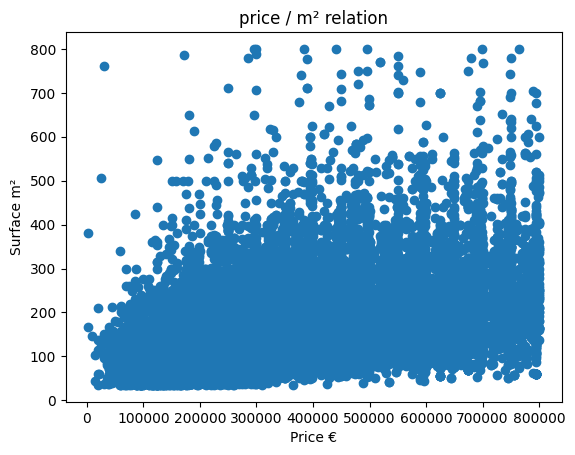

In [112]:
plt.scatter(df['price'],df['surface'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('Surface m²')

Text(0, 0.5, 'number of bedrooms')

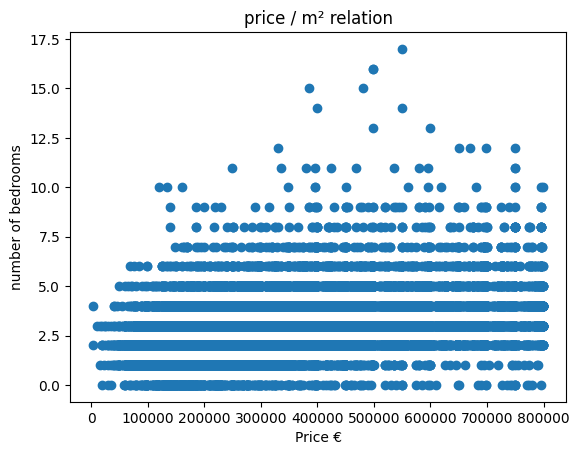

In [113]:
plt.scatter(df['price'],df['number_of_bedrooms'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('number of bedrooms')

## Data preprocessing

transformer = make_column_transformer(
    (OneHotEncoder(), ['type_of_property']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.columns.to_list()

### Drop values from onehotencoder

This part is not longer in use

drop_list = ['onehotencoder__x0_APARTMENT',
 #'onehotencoder__x0_HOUSE',
 'surface',
 'number_of_bedrooms',
 #'postal_code',
 'land_surface',
 'garden',
 'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_surface',
 'number_of_facades',
 'state_of_the_building',
 'zip_code_ponderation',
 'price']

transformed_df = transformed_df[drop_list]

for index,atribute in enumerate(transformed_df.columns.to_list()):
    print(atribute)
    print(transformed_df[transformed_df.columns.to_list()[index]].value_counts())
    print('\n')